# Grover's Algorithm for Quantum Database Search

Based on the tutorial found on https://qiskit.org/textbook/ch-algorithms/grover.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# qiskit imports
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# for visualizations
from qiskit.visualization import plot_histogram, array_to_latex

# initialize the simulator
sim = Aer.get_backend('aer_simulator')

In [2]:
# n == number of qubits in the quantum circuit
n = 2
grover_circuit = QuantumCircuit(n)

In [3]:
# put each qubit through a Hadamard gate
def initialize_s(circuit, qubits):
    for q in qubits:
        circuit.h(q)
    return circuit

In [4]:
# function for creating an n-qubit diffuser
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

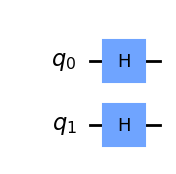

In [5]:
# initialize our circuit
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw(output='mpl')

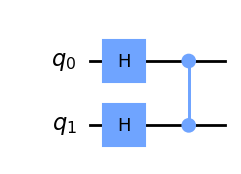

In [6]:
# apply the Oracle (oracles are specific based on qubit length)
grover_circuit.cz(0,1) # Oracle
grover_circuit.draw(output='mpl')

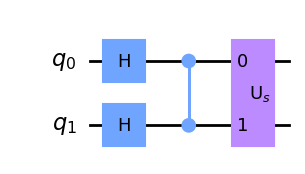

In [7]:
# apply the diffuser
#grover_circuit.append(diffuser(n), [0,1])

grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw(output='mpl')

In [8]:
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()

array_to_latex(statevec, prefix="|\\psi\\rangle =")

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-87 contains invalid instructions {"gates": {U$_s$}} for "statevector" method.


QiskitError: 'ERROR:  [Experiment 0] Circuit circuit-87 contains invalid instructions {"gates": {U$_s$}} for "statevector" method. ,  ERROR: Circuit circuit-87 contains invalid instructions {"gates": {U$_s$}} for "statevector" method.'

### This shows that we get the state |11>.

In [ ]:
grover_circuit.measure_all()

qobj = assemble(grover_circuit)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

### This proves that we get the state |11>, 100% of the time.